# Project: Investigate Socioeconomic Indicators in Chicago

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal. This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on the Data description text file.



### Question(s) for Analysis
How many community areas in Chicago have a hardship index greater than 50.0?

What is the maximum value of hardship index in this dataset?

Which community area which has the highest hardship index?

Which Chicago community areas have per-capita incomes greater than $60,000?

 Which Chicago community areas have the highest Percent of housing crowded ?
 
 Which Chicago community areas are the richest ?
 
 Which Chicago regions need to develope their educational level ?

Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

In [1]:
# Loading required Library for anaconda
! pip install openpyxl 
# or use !conda install openpyxl ,for anaconda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.3 MB/s eta 0:00:00


In [2]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing Dataset
df = pd.read_excel('../input/socioeconomic-indicators-in-chicago/Socioeconomic Indicators in Chicago.xlsx')

Note: After loading the excel file on your PC, you can change the file path as follows: pd.read('yourfilepath/filename.xlsx')

In [4]:
# Diplay first 5 rows from the data
df.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0



### Data Cleaning 

Let's check if our datasets contain "null" values or not?, and if the datasets contain "null" values we will process these "null" values to get a clean datasets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ca                                           77 non-null     float64
 1   community_area_name                          78 non-null     object 
 2   percent_of_housing_crowded                   78 non-null     float64
 3   percent_households_below_poverty             78 non-null     float64
 4   percent_aged_16_unemployed                   78 non-null     float64
 5   percent_aged_25_without_high_school_diploma  78 non-null     float64
 6   percent_aged_under_18_or_over_64             78 non-null     float64
 7   per_capita_income_                           78 non-null     int64  
 8   hardship_index                               77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [6]:
# Check for Null Data
df.isnull().sum()

ca                                             1
community_area_name                            0
percent_of_housing_crowded                     0
percent_households_below_poverty               0
percent_aged_16_unemployed                     0
percent_aged_25_without_high_school_diploma    0
percent_aged_under_18_or_over_64               0
per_capita_income_                             0
hardship_index                                 1
dtype: int64

In [7]:
# We notice that there are a very few null data whcih we can delete
df.dropna(inplace = True)

In [8]:
# Check for duplicated data
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

Now, we will move to the analysis phase, we will try to ask some questions and find answers to them, and by that we can analysis our data and we can make a strong conclusion about our findings.

In [9]:
df.head(3)

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


### Research Question 1:  How many community areas in Chicago have a hardship index greater than 50.0 ?


In [10]:
# We can filter our data to communities that have a hardship index graeter than 50.0
Hardship_communities = df[['community_area_name','hardship_index']][df['hardship_index'] > 50.0].reset_index()

In [11]:
Hardship_communities.drop(columns=['index'], inplace = True)

In [12]:
Hardship_communities

,community_area_name,hardship_index
0,Albany Park,53.0
1,Belmont Cragin,70.0
2,Hermosa,71.0
3,Humboldt park,85.0
4,Austin,73.0
5,West Garfield Park,92.0
6,East Garfield Park,83.0
7,North Lawndale,87.0
8,South Lawndale,96.0
9,Lower West Side,76.0


In [13]:
print("Number of Communities areas in Chicago have with a hardship index greater than 50.0 is :", len(Hardship_communities))

Number of Communities areas in Chicago have with a hardship index greater than 50.0 is : 38


### Research Question 2:  What is the maximum value of hardship index in this dataset ?

In [14]:
print('The maximum value of hardship index is :',Hardship_communities['hardship_index'].max())

The maximum value of hardship index is : 98.0


### Research Question 3: Which community area which has the highest hardship index?

In [15]:
area = Hardship_communities['community_area_name'][Hardship_communities['hardship_index']==98.0]
area

25    Riverdale
Name: community_area_name, dtype: object

In [16]:
print("The community area that has the highest hardship index is: ",area.values)

The community area that has the highest hardship index is:  ['Riverdale']


### Research Question 4: Which Chicago community areas have per-capita incomes greater than $60,000?

In [17]:
Per_capita_communities = df[['community_area_name', 'per_capita_income_']][df['per_capita_income_']>60000]

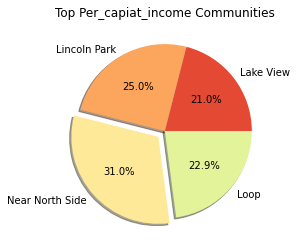

In [18]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('RdYlGn')
  
# plotting data on chart
plt.pie(Per_capita_communities['per_capita_income_'], 
        labels =Per_capita_communities['community_area_name'],
        explode=[0, 0, 0.1, 0] ,colors = palette_color,autopct ='%.1f%%', shadow = True)
plt.title("Top Per_capiat_income Communities")        
# displaying chart
plt.show()

We notice from the piechart above that "Near North Side" region, has the highest per_capita_income (person income).



### Research Question 5: Which Chicago community areas have the highest Percent of housing crowded ?

In [19]:
Most_crouded_regions = df.groupby('community_area_name')['percent_of_housing_crowded'].max().nlargest(10)

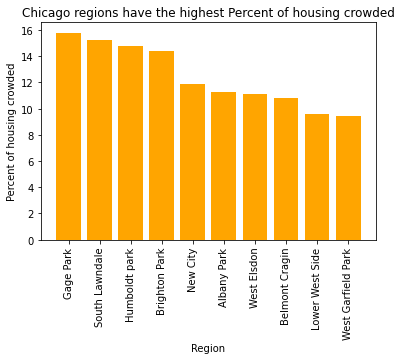

In [20]:
plt.bar(x=Most_crouded_regions.index, height= Most_crouded_regions.values, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Percent of housing crowded")
plt.title("Chicago regions have the highest Percent of housing crowded")
plt.show();

### Research Question 6: Which Chicago community areas are the richest ?


In [21]:
Richest_regions = df.groupby('community_area_name')['percent_households_below_poverty'].max().nsmallest(3)

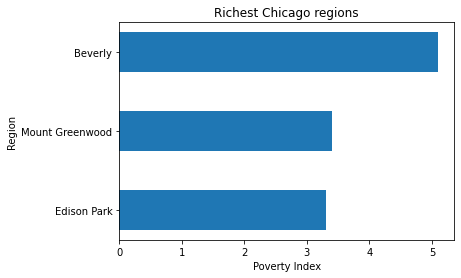

In [22]:
plt.barh(width=Richest_regions.values, y=Richest_regions.index,height=0.5, align='center')
plt.ylabel('Region')
plt.xlabel('Poverty Index')
plt.title('Richest Chicago regions')
plt.show()

### Research Question 7: Which Regions need to develop their educational level ?

In [23]:
Low_edu = df.groupby('community_area_name')['percent_aged_25_without_high_school_diploma'].max().nlargest(5).reset_index()

In [24]:
Low_edu

,community_area_name,percent_aged_25_without_high_school_diploma
0,South Lawndale,54.8
1,Gage Park,51.5
2,Brighton Park,45.1
3,Hermosa,41.6
4,New City,41.5


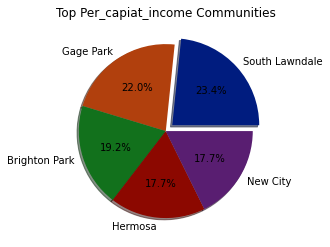

In [25]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(Low_edu['percent_aged_25_without_high_school_diploma'], 
        labels =Low_edu['community_area_name'],
        explode=[0.1, 0, 0, 0, 0] ,colors = palette_color,autopct ='%.1f%%', shadow = True)
plt.title("Top Per_capiat_income Communities")        
# displaying chart
plt.show()

### Let's have a look on the age distribution of Chicago regions

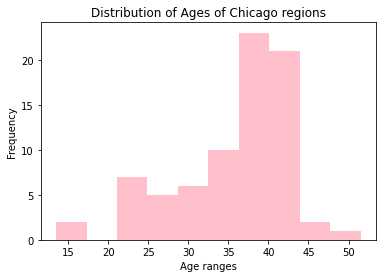

In [26]:
plt.hist(df["percent_aged_under_18_or_over_64"],color='pink')
plt.xlabel("Age ranges")
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Chicago regions')
plt.show()

WE notice that the ages 35-40 are the dominant ages in Chicago regions

### Research Question 8: Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

In [27]:
col1="hardship_index"
col2="per_capita_income_"

corr = df[col1].corr(df[col2])
print ("Correlation between {} and {} is : {}".format(col1,col2,round(corr, 2))) 

Correlation between hardship_index and per_capita_income_ is : -0.85


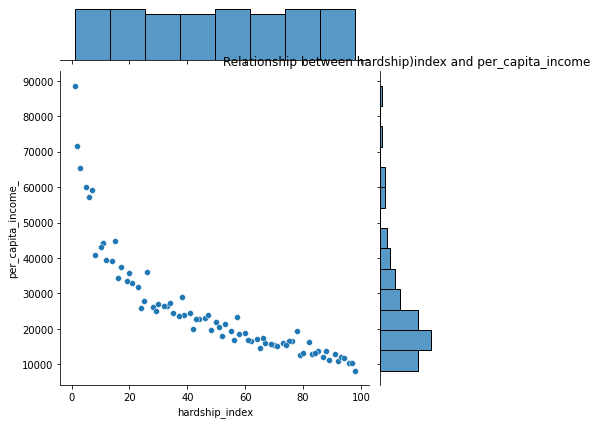

In [28]:
# Let's darw the scatter plot using seaborn library
plot = sns.jointplot(x='hardship_index', y='per_capita_income_', data=df)
plt.title('Relationship between hardship)index and per_capita_income')
plt.show()

We notice that thers is a strong negative correlation between hardship index and per_capita_income, when hardship index increases, person income in his city region decreses and vice versa. 

## Conclusions

At the end of the analysis we got answers to our questions such as:
How many community areas in Chicago have a hardship index greater than 50.0? Riverdale, Fuller Park, and South Lawndale

What is the maximum value of hardship index in this dataset? 98.0

Which community area which has the highest hardship index? Riverdale

Which Chicago community areas have per-capita incomes greater than $60,000?
Near North Side, Lincoln Park, Loop, and Lake View

Which Chicago community areas have the highest Percent of housing crowded ?

Which Chicago community areas are the richest ? Edison Park, Mount Greenwood, Beverly 
   
Which regions need to develop their educational level ? South Lawndale,Gage Park,Brighton Park,Hermosa,New City

Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables. Negative correlation (-0.85)

And we have noticed at the last question answer, that when hardship index increases, person income dcreases and vice versa.

## Thanks for your time